# Assignment 5: K-NNs and Ensemble Methods

For this assignment, answer directly on this Jupyter notebook. Once you're done, please submit the assignment as "Name_Surname_Assignment5.ipynb"

*Don't forget that commenting your code is very important!*




###  K-NN Implementation

- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).
- Evaluate and plot model performance for different values of k.

For this question, we will be using the classic Iris dataset, available in sklearn.

### 1. Import packages

###### Importing packages and knowing what packages you need for a project is crucial. We will not be reminding you which packages you need for each question and for the assignment in general. Please import the packages at your own discretion. Although it is common practice to import all packages at once at the beginning, don't hesitate to revisit the next cell, and import more packages as you may need. 

In [36]:
# Implement kNN by hand. It might be useful to store all distances in one array/list
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import operator

from sklearn.datasets import load_iris
from sklearn.utils import shuffle

### 2. Load the Iris dataset

In [37]:
# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Preview dataset
iris_df.to_csv('./iris.csv')

###### In order to evaluate the performance of our kNN implementation, we first split the dataset into training and test sets. A 70/30 split or something similar should suffice. Remember class balance within both train/test sets is important.

In [74]:
### YOUR CODE HERE - Shuffle dataset, then split for balanced classes
iris_df=shuffle(iris_df)
iris_train,iris_test=np.split(iris_df, [int(.70*len(iris_df))])
#iris_train,'\n', iris_test

### 3. Defining a distance metric

###### To define similarity between two given points, we must define a distance metric. Write a method that takes  two points as input and returns the distance between the points. Look at the format of each point in the sample case below.

In [75]:
### YOUR CODE HERE - Write method that returns Euclidean distance between two points, last element in point array is class 

def getDistance(p1, p2):
    """ 
    p1:  a numpy array, last element of the array is the class of the point
    p2:  a numpy array, last element of the array is the class of the point
    Calculates the Euclidean distance between two points. Returns dist float
    """
    sum=np.array([(p2[i]-p1[i])**2 for i in range(len(p1)-1)]).sum()
    return pow(sum,0.5)

######  Let's test our newly written method on the following samples.

In [76]:
data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']
distance = getDistance(data1, data2)

print(distance)

3.4641016151377544


### 4. Finding k nearest neighbours

###### Now that we've defined a distance metric, we can use it collect the k most similar instances for a new test instance. Write a method calculating the distance between a test point and all training instances, selecting a subset with the smallest distance values. It might be useful to store all the distances in a list/array, since Python has a built-in sorting function.

In [77]:
### YOUR CODE HERE - Write method calculating the distance for all instances, selecting a subset with the smallest distance values.
def sort_list(list1, list2): 
    return [x for _, x in sorted(zip(list2,list1), key=lambda pair: pair[0])] 
def getNeighbours(trainingSet, sample, k):
    """
    trainingSet: a list of points, where each point is a numpy array and the last element of the array is the class of the point
    sample: a numpy array, last element of the array is the class of the point
    k: positive integer 
    
    Calculates k nearest neighbours using a distance metric. 
    
    Returns neighbours list
    """
    distances=[]
    for i in range(len(trainingSet)):
        distances.append(getDistance(sample,trainingSet[i]))
    points_sorted=sort_list(trainingSet,distances)
    neighbors=points_sorted[0:k]
    return neighbors

######  Let's test our newly written method on the following samples.

In [78]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b'],[6,6,6,'a']]
testInstance = [5, 5, 5]

neighbors = getNeighbours(trainSet, testInstance, 1)
print(neighbors)

[[4, 4, 4, 'b']]


In [79]:
unique, counts = np.unique(np.array(trainSet)[:,len(trainSet[0])-1], return_counts=True)
np.array([unique,counts])

array([['a', 'b'],
       ['2', '1']], dtype='<U21')

###### Now to build a prediction model, write a method that returns a prediction given k nearest neighbours from the previous method. (Hint: one way you can do this is to build a dictionary, and sort the key-value pairs to determine which class occurs the most often!)

In [80]:
### YOUR CODE HERE - Write method that takes in k nearest neighbours as input, and votes based on the majority class.

def predict(neighbours):
    """ 
    neighbours: a list of points, where each point is a numpy array and the last element of the array is the class of the point
    
    Returns predicted class response in string format based off majority vote from k neighbours set 
    """
    unique,counts=np.unique(np.array(neighbours)[:,len(neighbours[0])-1],return_counts=True)
    return sort_list(unique,counts)[len(unique)-1]

###### Test your method on the following samples

In [81]:
neighbors = np.array([[1,1,1,1], [2,2,2,3], [3,3,3,2]])
response = predict(neighbors)
print(response)

3


### Measuring Model Performance

######  We're basically ready to test the performance of our very own k-NN implementation! One popular classification metric is accuracy, use the following method to check how well our k-NN algorithm performs on the test set we left aside.

In [82]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        #print(testSet[x],'\n',predictions[x])
        if (testSet[x][-1] == predictions[x]):
            correct += 1
    return (correct/float(len(testSet))) * 100.0

##### Test the method on the following samples.

In [83]:
testSet = [[1,1,1,'1'], [2,2,2,'1'], [3,3,3,'2']]
predictions_t = ['1', '1', '1']
accuracy = getAccuracy(testSet, predictions_t)
print(accuracy)

66.66666666666666


In [84]:
arr_test=iris_test.to_numpy()
arr_train=iris_train.to_numpy()
predict(getNeighbours(arr_train,arr_test[5],4))

2.0

In [85]:
nei=getNeighbours(arr_train,arr_test[5],4)
#print(len(nei))
#pred.append(predict(nei))
res=predict(nei)
#print(pred)
print(res)

2.0


In [86]:
pred=[]
for i in range(len(arr_test)):
    nei=getNeighbours(arr_train,arr_test[i],1)
    #print(len(nei))
    #pred.append(predict(nei))
    res=predict(nei)
    #print(pred)
    print(res)

2.0
1.0
1.0
2.0
0.0
2.0
0.0
1.0
1.0
0.0
2.0
1.0
1.0
2.0
2.0
1.0
2.0
0.0
1.0
2.0
1.0
0.0
1.0
2.0
1.0
2.0
0.0
2.0
2.0
2.0
1.0
0.0
0.0
1.0
2.0
2.0
2.0
0.0
2.0
1.0
1.0
0.0
0.0
0.0
1.0


######  Make predictions on the test set for different values of k. Compare the accuracy for different values and plot test performance, explaining why you think performance increases or decreases for different values of k (WRITE ANSWER IN BOX BELOW PLOT). Loop from k=1 to k=49 (inclusively), only considering cases where k is odd.

In [87]:
### YOUR CODE HERE - Create a dictionary to store accuracies for different values of k.
acc_dic=dict({})
arr_test=iris_test.to_numpy()
arr_train=iris_train.to_numpy()
for k in range(1,51,2):
    pred=[]
    for i in range(len(arr_test)):
        nei=getNeighbours(arr_train,arr_test[i],k)
        #print(len(nei))
        pred.append(predict(nei))
    #print(pred)
    acc_dic[k]=getAccuracy(arr_test,pred)
#print(acc_dic)

In [88]:
acc_dic

{1: 91.11111111111111,
 3: 93.33333333333333,
 5: 93.33333333333333,
 7: 95.55555555555556,
 9: 97.77777777777777,
 11: 95.55555555555556,
 13: 97.77777777777777,
 15: 97.77777777777777,
 17: 93.33333333333333,
 19: 95.55555555555556,
 21: 93.33333333333333,
 23: 93.33333333333333,
 25: 93.33333333333333,
 27: 93.33333333333333,
 29: 93.33333333333333,
 31: 93.33333333333333,
 33: 95.55555555555556,
 35: 93.33333333333333,
 37: 91.11111111111111,
 39: 91.11111111111111,
 41: 86.66666666666667,
 43: 88.88888888888889,
 45: 88.88888888888889,
 47: 88.88888888888889,
 49: 86.66666666666667}

##### Plot a bar chart, having the different values of k on the x-axis and the test accuracy (in %) on the y-axis. Add a plot title, and choose a suitable format for readability.

<BarContainer object of 25 artists>

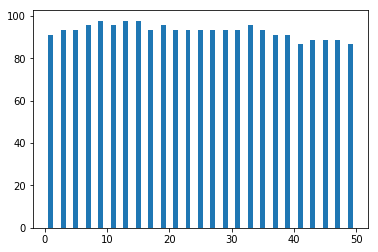

In [89]:
### YOUR CODE HERE - Create a bar plot
plt.bar(acc_dic.keys(),acc_dic.values())

### <span style="background-color: #F9F2EB"> YOUR EXPLANATION HERE...  </span>
*(Hint: think of the bias-variance trade-off/ AND underfitting/overfitting)*
The accuracy is very high at the beginning since the points that are in the same class tend to be close to each other (sometimes, because when I run the program again which I did, the accuracies were different since the test-train split was different, and that's the reason why the graph doesn't correspond to the description. )
then the accuracy goes down to 91.1%, surely due to variance and/or underfititng. The accuracy then increases to reach 93.3% at k=27 which may be the best generalized values of K. Finally the accuracy goes down due to overfitting. 

###  Classification Algorithm Comparison

Now that we've learned about a couple of classification algorithms, you must be wondering: which algorithm should I choose for a given task? In the following question, we'll learn to investigate model performance for various algorithms and then based off the best algorithm, do some hyperparameter tuning.

###### 1) Import necessary packages from sklearn.

Here are a few popular classification algorithms available from the sklearn API. If you're curious on what supervised learning algorithms are available, don't hesitate to read up on documentation: https://scikit-learn.org/stable/supervised_learning.html (this might be useful brainstorming for your hackathon idea!)

In [91]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

###### 2) Load the Pima Indians Diabetes Dataset using pandas.

Just another way of downloading a CSV file from online! Let's inspect the dataset we're working with, the Pima Indians Diabetes Dataset.

" This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. " - Kaggle

In [92]:
# load dataset

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pd.read_csv(url, names=names)  # names parameter is simply used to name the columns, defaults to None if unspecified

df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###### 3) Take the values of the DataFrame as a numpy array, then separate the features and target variable columns into X, y respectively.

We don't directly split up the train/test splits, because we'll be using the sklearn k cross-fold validation implementation, which takes in the entire dataset as an argument.


In [93]:
array = df.values
print(array.shape)

X = array[:,0:8]  # Take first 8 columns as features
y = array[:,8]  # Take last column as the target variable

(768, 9)


Note that we're going to fix the random seed in the data partitioning step of k cross-fold validation, for the simple reason of wanting to minimize performance differences to be due to different data partitions seen by each algorithm. Hence, adding this seed will cause every algorithm to see the same shuffled data.

In [94]:
# Fix random seed in data partitions
seed = 7

# Prepare models
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=500)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

###### 4) Now, we evaluate each model individually and store cross-validation results for preliminary comparison. Note that we haven't done any hyperparameter tuning as we have for our k-NN implementation previously.

In [95]:
# Evaluate each model individually

results = []
names = []
scoring = 'accuracy'

for name, model in models:
    
    kfold = model_selection.KFold(n_splits=10, random_state=seed)  # Provides train/test indices to split data in train/test sets.
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)  
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())  # Provides the mean accuracy, std dev for results
    print(msg)


LR: 0.7760423786739576 (0.051575452620868226)
LDA: 0.773462064251538 (0.05159180390446138)
KNN: 0.7265550239234451 (0.06182131406705549)
CART: 0.6965481886534517 (0.06526022126839198)
RF: 0.7681989063568012 (0.052655832464710034)
NB: 0.7551777170198223 (0.04276593954064409)
SVM: 0.6510252904989747 (0.07214083485055327)


###### 5) Use a boxplot to show results

In both academia/research and industry, graphs are necessary to simply display results and convey messages more clearly. Below, we show a boxplot, where each horizontal line represents the median result obtained, the T-shaped ends show the highest and lowest results. The box simply contains where "most" the results lie.

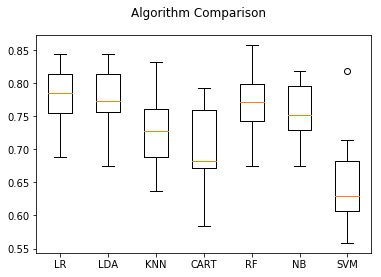

In [96]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Now, it's your turn!

After doing some preliminary comparison between a few classification algorithms, you can now select a few and do some hyperparameter tuning. For example, random forests did fairly well, and we haven't even tuned any of its hyperparameters (e.g. max tree depth, number of trees, etc.) To find optimal hyperparameters, it's common to perform a **grid search** over a parameter space. Essentially, you want to specify a range of values for different hyperparameters within an algorithm, and try out every combination of parameters that are evaluated on a test set left aside (Do you see the recurring theme of leaving data aside?). Typically, you'd select the hyperparameter values that worked best on your test set. 

Sklearn has an API for just that, which takes in a **model**, and a **dictionary of parameters** to search over: [scikit-learn docs](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) . Follow the example [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py) to see how to use the API:
- Select an algorithm of your choice from the sklearn classification models (Random Forests is a nice one though)
- Used the **GridSearchCV** module to find optimal hyperparameters for your model (pick 2-3 parameters to search over!)
- Use classification report to show model performance
- Let us know if you have any cool results to show!

In [102]:
### YOUR CODE HERE - Find optimal hyperparameters for an algorithm of your choice
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
model=RandomForestClassifier()
tuned_parameters = {'n_estimators': [1,10,100,1000], 
                    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                    'bootstrap':[True,False]}
### YOUR CODE HERE - Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
### YOUR CODE HERE - Set the parameters by cross-validation
clf=GridSearchCV(model, tuned_parameters, cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()
#Test
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters set found on development set:

{'bootstrap': True, 'max_depth': 50, 'n_estimators': 100}

Grid scores on development set:

0.745 (+/-0.084) for {'bootstrap': True, 'max_depth': None, 'n_estimators': 1}
0.784 (+/-0.061) for {'bootstrap': True, 'max_depth': None, 'n_estimators': 10}
0.771 (+/-0.049) for {'bootstrap': True, 'max_depth': None, 'n_estimators': 100}
0.794 (+/-0.062) for {'bootstrap': True, 'max_depth': None, 'n_estimators': 1000}
0.690 (+/-0.089) for {'bootstrap': True, 'max_depth': 10, 'n_estimators': 1}
0.773 (+/-0.076) for {'bootstrap': True, 'max_depth': 10, 'n_estimators': 10}
0.797 (+/-0.061) for {'bootstrap': True, 'max_depth': 10, 'n_estimators': 100}
0.802 (+/-0.078) for {'bootstrap': True, 'max_depth': 10, 'n_estimators': 1000}
0.727 (+/-0.109) for {'bootstrap': True, 'max_depth': 20, 'n_estimators': 1}
0.786 (+/-0.081) for {'bootstrap': True, 'max_depth': 20, 'n_estimators': 10}
0.794 (+/-0.071) for {'bootstrap': True, 'max_depth': 20, 'n_estimator

c:\program files\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


###### Now you're familiar with fundamental, but VERY important algorithm selection and evaluation techniques! Congrats :)